## Exploratory Analysis

Imports

In [3]:
import sys
sys.path.append('../')
from utils.imports import *

path = kagglehub.dataset_download("skillsmuggler/amazon-ratings")

Load Data

In [4]:
csv_file = os.path.join(path, "ratings_Beauty.csv")
df_customers = pd.read_csv(csv_file, names=['userId', 'productId', 'rating', 'timestamp'], skiprows=1, low_memory=False)
df_customers['timestamp'] = pd.to_datetime(df_customers['timestamp'], unit='s')
df_customers['year'] = df_customers['timestamp'].dt.year
df_customers['month'] = df_customers['timestamp'].dt.month
df_customers['day'] = df_customers['timestamp'].dt.day
df_customers.head()

,userId,productId,rating,timestamp,year,month,day
0,A39HTATAQ9V7YF,0205616461,5.000,2013-05-28,2013,5,28
1,A3JM6GV9MNOF9X,0558925278,3.000,2012-12-14,2012,12,14
2,A1Z513UWSAAO0F,0558925278,5.000,2014-07-07,2014,7,7
3,A1WMRR494NWEWV,0733001998,4.000,2013-10-24,2013,10,24
4,A3IAAVS479H7M7,0737104473,1.000,2010-05-19,2010,5,19


Exploration Data

In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   productId  object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
 4   year       int32         
 5   month      int32         
 6   day        int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 84.9+ MB


In [6]:
df_customers.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
year         0
month        0
day          0
dtype: int64

In [7]:
df_customers.head()

,userId,productId,rating,timestamp,year,month,day
0,A39HTATAQ9V7YF,0205616461,5.000,2013-05-28,2013,5,28
1,A3JM6GV9MNOF9X,0558925278,3.000,2012-12-14,2012,12,14
2,A1Z513UWSAAO0F,0558925278,5.000,2014-07-07,2014,7,7
3,A1WMRR494NWEWV,0733001998,4.000,2013-10-24,2013,10,24
4,A3IAAVS479H7M7,0737104473,1.000,2010-05-19,2010,5,19


In [8]:
df_customers.describe()

,rating,timestamp,year,month,day
count,2023070.000,2023070,2023070.000,2023070.000,2023070.000
mean,4.149,2013-02-09 05:45:36.563737856,2012.657,5.957,15.509
min,1.000,1998-10-19 00:00:00,1998.000,1.000,1.000
25%,4.000,2012-10-15 00:00:00,2012.000,3.000,8.000
50%,5.000,2013-07-03 00:00:00,2013.000,6.000,15.000
75%,5.000,2014-02-04 00:00:00,2014.000,9.000,23.000
max,5.000,2014-07-23 00:00:00,2014.000,12.000,31.000
std,1.312,NaN,1.509,3.448,8.770


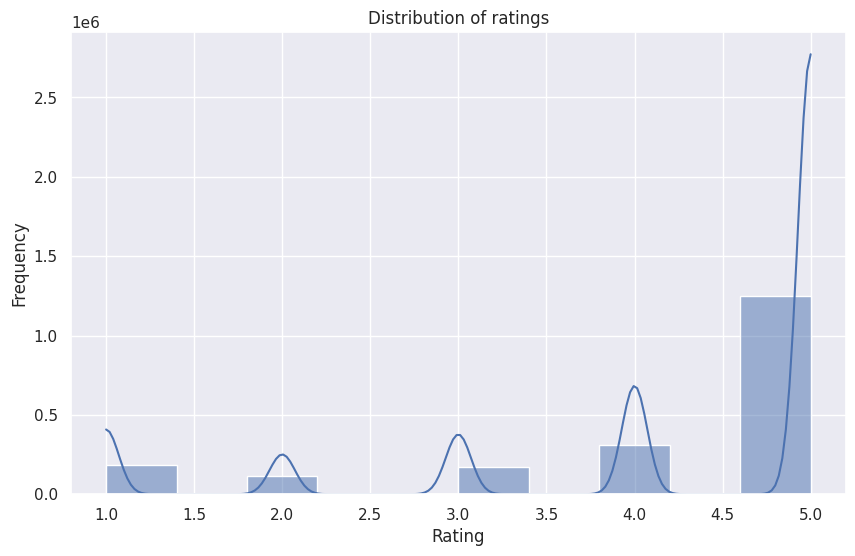

In [9]:
sns.histplot(df_customers['rating'], bins=10, kde=True)
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [10]:
user_ratings_count = df_customers['userId'].value_counts()

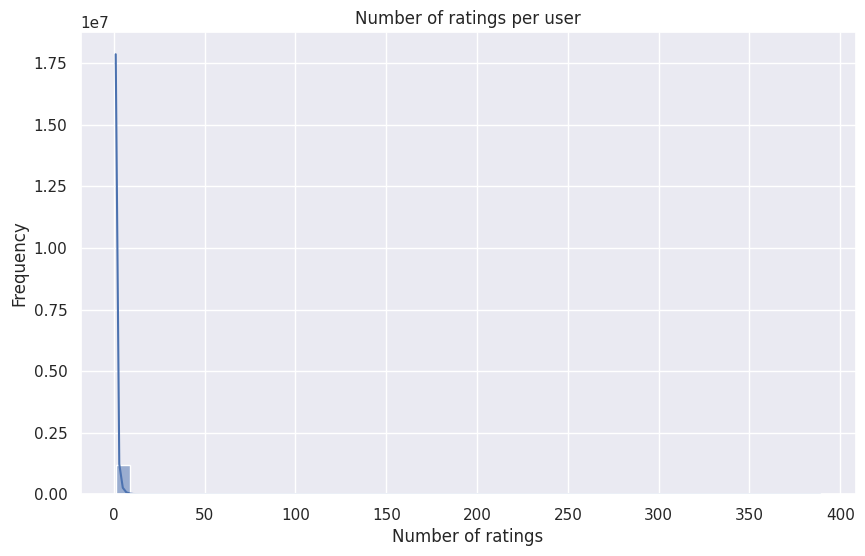

In [11]:
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title("Number of ratings per user")
plt.xlabel("Number of ratings")
plt.ylabel("Frequency")
plt.show()

In [12]:
product_ratings_count = df_customers['productId'].value_counts()

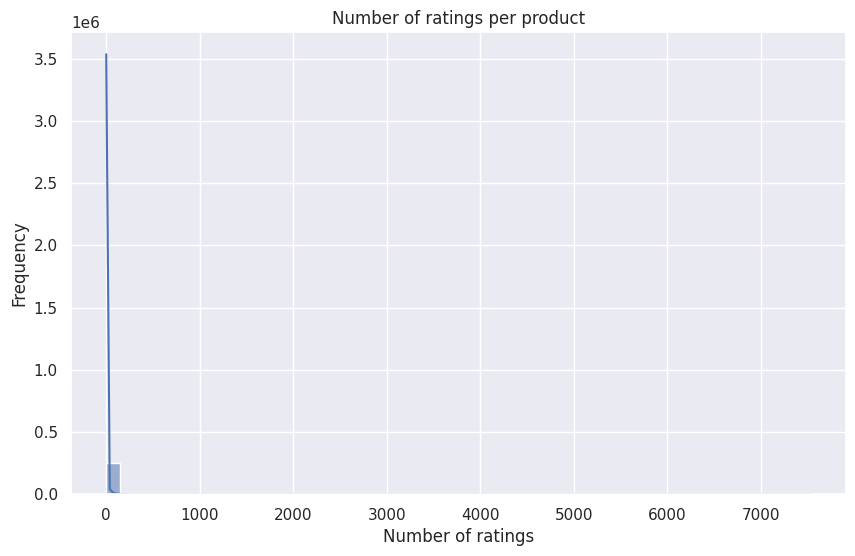

In [13]:
sns.histplot(product_ratings_count, bins=50, kde=True)
plt.title("Number of ratings per product")
plt.xlabel("Number of ratings")
plt.ylabel("Frequency")
plt.show()

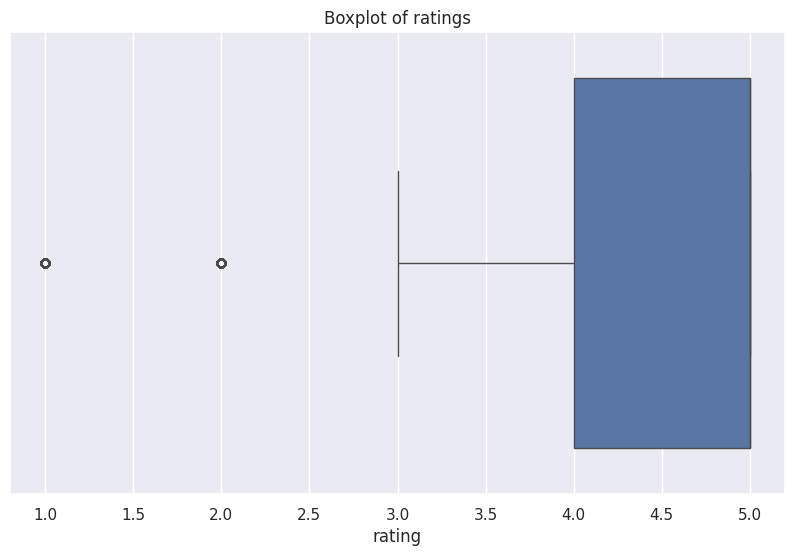

In [14]:
sns.boxplot(x=df_customers['rating'])
plt.title("Boxplot of ratings")
plt.show()

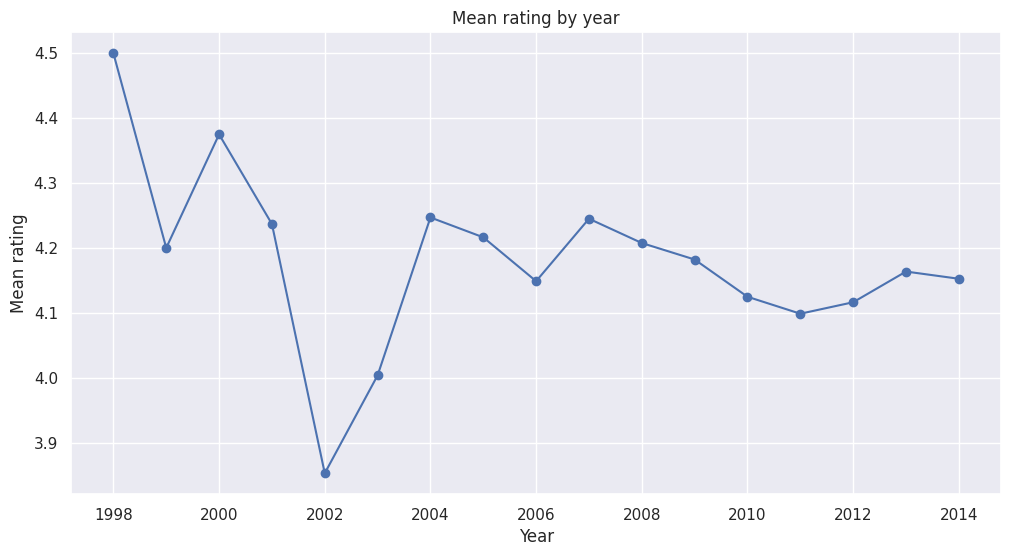

In [15]:
plt.figure(figsize=(12, 6))
df_customers.groupby('year')['rating'].mean().plot(kind='line', marker='o')
plt.title("Mean rating by year")
plt.xlabel("Year")
plt.ylabel("Mean rating")
plt.grid(True)
plt.show()

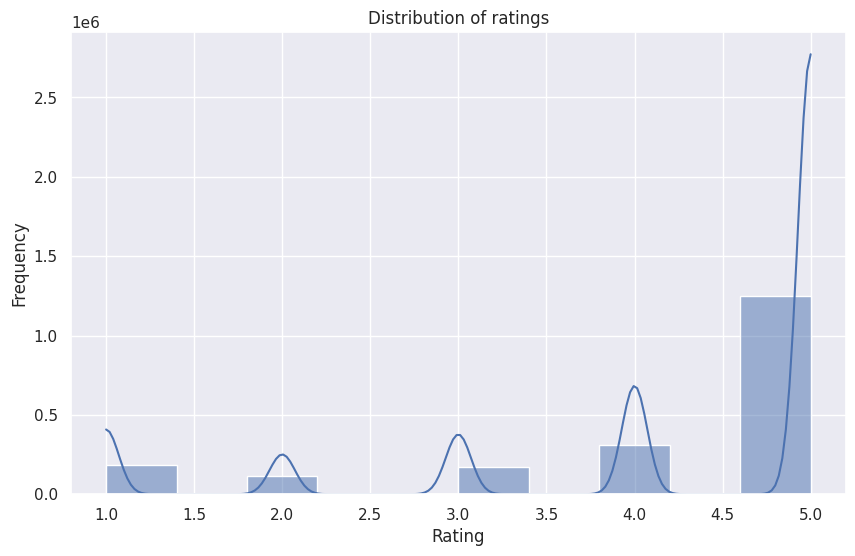

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_customers['rating'], bins=10, kde=True)
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [17]:
user_stats = df_customers.groupby('userId').agg({
    'rating': ['count', 'mean', 'std']
}).reset_index()
user_stats.columns = ['userId', 'total_ratings', 'avg_rating', 'std_rating']
user_stats.head()

,userId,total_ratings,avg_rating,std_rating
0,A00008821J0F472NDY6A2,1,5.000,NaN
1,A000186437REL8X2RW8UW,1,5.000,NaN
2,A0002574WYJMBWKNCPY8,1,3.000,NaN
3,A00029263J863WSR0TDRS,1,5.000,NaN
4,A00031961JI1CBNV98TW,1,5.000,NaN


In [18]:
active_users = user_stats[user_stats['total_ratings'] >= 5].sort_values('total_ratings', ascending=False)

print("Top 10 Most Active Users:")
print(active_users.head(10).to_string(index=False))


print("\nStatistics for users with 5+ ratings:")
print(f"Number of active users: {len(active_users)}")
print("\nRating statistics for active users:")
print(active_users[['total_ratings', 'avg_rating', 'std_rating']].describe())

Top 10 Most Active Users:
        userId  total_ratings  avg_rating  std_rating
A3KEZLJ59C1JVH            389       3.704       1.232
A281NPSIMI1C2R            336       4.792       0.511
A3M174IC0VXOS2            326       4.414       0.726
A2V5R832QCSOMX            278       4.417       0.918
A3LJLRIZL38GG3            276       4.551       0.739
 ALQGOMOY1F5X9            275       2.218       1.793
 AKMEY1BSHSDG7            269       4.621       0.965
A3R9H6OKZHHRJD            259       3.969       1.099
A1M04H40ZVGWVG            249       3.835       1.286
A1RRMZKOMZ2M7J            225       3.356       1.121

Statistics for users with 5+ ratings:
Number of active users: 52374

Rating statistics for active users:
       total_ratings  avg_rating  std_rating
count      52374.000   52374.000   52374.000
mean           8.970       4.202       0.938
std            9.032       0.662       0.579
min            5.000       1.000       0.000
25%            5.000       3.800       0.488
50% 

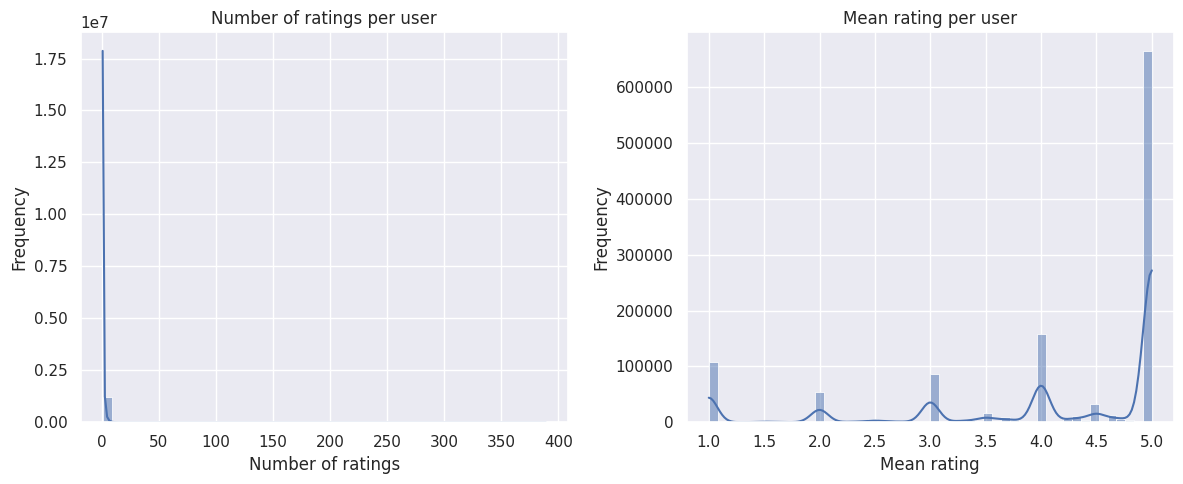

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(user_stats['total_ratings'], bins=50, kde=True)
plt.title("Number of ratings per user")
plt.xlabel("Number of ratings")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(user_stats['avg_rating'], bins=50, kde=True)
plt.title("Mean rating per user")
plt.xlabel("Mean rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [20]:
product_stats = df_customers.groupby('productId').agg({
    'rating': ['count', 'mean', 'std']
}).reset_index()
product_stats.columns = ['productId', 'total_ratings', 'avg_rating', 'std_rating']

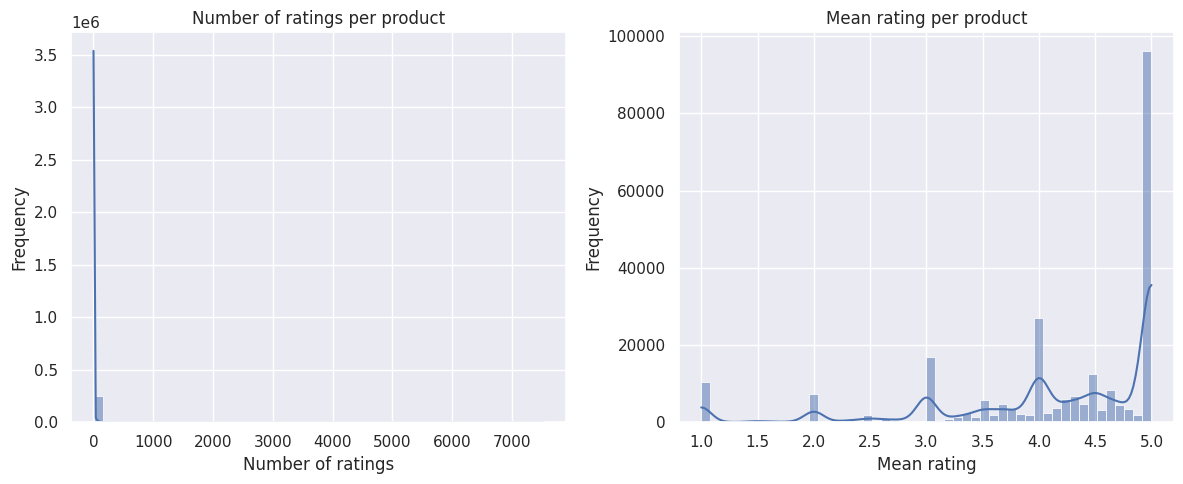

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(product_stats['total_ratings'], bins=50, kde=True)
plt.title("Number of ratings per product")
plt.xlabel("Number of ratings")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(product_stats['avg_rating'], bins=50, kde=True)
plt.title("Mean rating per product")
plt.xlabel("Mean rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

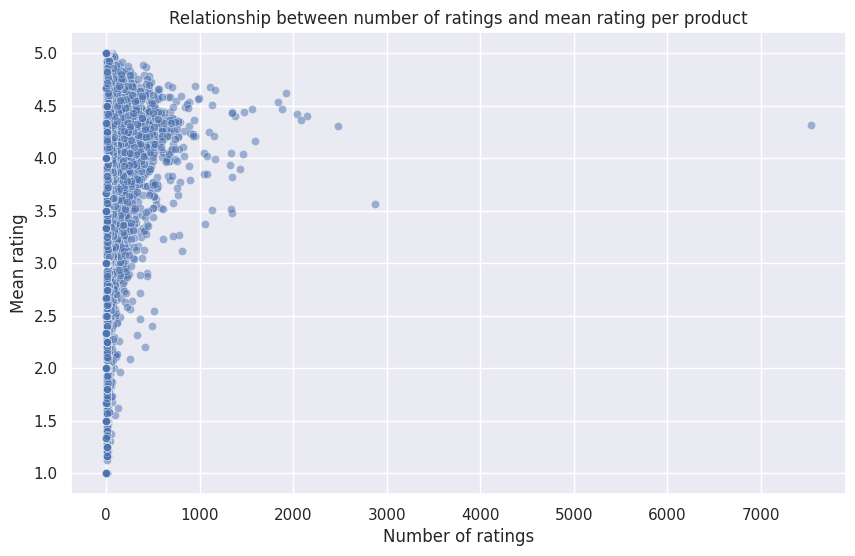

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_stats, x='total_ratings', y='avg_rating', alpha=0.5)
plt.title("Relationship between number of ratings and mean rating per product")
plt.xlabel("Number of ratings")
plt.ylabel("Mean rating")
plt.show()

In [23]:
print(f"Total unique users: {df_customers['userId'].nunique()}")
print(f"Total unique products: {df_customers['productId'].nunique()}")
print(f"Analysis period: from {df_customers['timestamp'].min().strftime('%d-%m-%Y')} to {df_customers['timestamp'].max().strftime('%d-%m-%Y')}")
print("\nTop 10 most rated products:")
print(product_stats.nlargest(10, 'total_ratings')[['productId', 'total_ratings', 'avg_rating']])

Total unique users: 1210271
Total unique products: 249274
Analysis period: from 19-10-1998 to 23-07-2014

Top 10 most rated products:
         productId  total_ratings  avg_rating
65766   B001MA0QY2           7533       4.321
10516   B0009V1YR8           2869       3.569
110873  B0043OYFKU           2477       4.310
2365    B0000YUXI0           2143       4.405
105018  B003V265QW           2088       4.365
41474   B000ZMBSPE           2041       4.422
94769   B003BQ6QXK           1918       4.626
124659  B004OHQR1Q           1885       4.466
43368   B00121UVU0           1838       4.538
17629   B000FS05VG           1589       4.160
